In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
import matplotlib.ticker as plticker
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [8]:
#load data 
world_cup = pd.read_csv('data/World-Cup-2022-Dataset.csv')
results = pd.read_csv('data/results.csv')

In [9]:
world_cup.head()

,Team,Group,Previous \nappearances,Previous \ntitles,Previous\n finals,Previous\n semifinals,Current \nFIFA rank,First match \nagainst,Match index,history with \nfirst opponent\n W-L,history with\n first opponent\n GD,Second match\n against,Match index.1,history with\n second opponent\n W-L,history with\n second opponent\n GD,Third match\n against,Match index.2,history with\n third opponent\n W-L,history with\n third opponent\nGD
0,Qatar,A,0,0,0,0,50,Ecuador,1,-1.0,-2.0,Senegal,17,-1.0,-1.0,Netherlands,33,NaN,NaN
1,Ecuador,A,3,0,0,0,44,Qatar,1,1.0,2.0,Netherlands,18,-1.0,-1.0,Senegal,34,-1.0,-1.0
2,Senegal,A,2,0,0,0,18,Netherlands,2,NaN,NaN,Qatar,17,NaN,NaN,Ecuador,34,5.0,5.0
3,Netherlands,A,10,0,3,5,8,Senegal,2,NaN,NaN,Ecuador,18,1.0,1.0,Qatar,33,NaN,NaN
4,England,B,15,1,1,3,5,Iran,3,NaN,NaN,USA,19,6.0,30.0,Wales,35,54.0,159.0


In [10]:
results.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0.0,0.0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4.0,2.0,Friendly,London,England,False
2,1874-03-07,Scotland,England,2.0,1.0,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2.0,2.0,Friendly,London,England,False
4,1876-03-04,Scotland,England,3.0,0.0,Friendly,Glasgow,Scotland,False


In [11]:
#Adding goal difference and establishing who is the winner 
winner = []
for i in range (len(results['home_team'])):
    if results ['home_score'][i] > results['away_score'][i]:
        winner.append(results['home_team'][i])
    elif results['home_score'][i] < results ['away_score'][i]:
        winner.append(results['away_team'][i])
    else:
        winner.append('Draw')
results['winning_team'] = winner

#adding goal difference column
results['goal_difference'] = np.absolute(results['home_score'] - results['away_score'])

results.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,winning_team,goal_difference
0,1872-11-30,Scotland,England,0.0,0.0,Friendly,Glasgow,Scotland,False,Draw,0.0
1,1873-03-08,England,Scotland,4.0,2.0,Friendly,London,England,False,England,2.0
2,1874-03-07,Scotland,England,2.0,1.0,Friendly,Glasgow,Scotland,False,Scotland,1.0
3,1875-03-06,England,Scotland,2.0,2.0,Friendly,London,England,False,Draw,0.0
4,1876-03-04,Scotland,England,3.0,0.0,Friendly,Glasgow,Scotland,False,Scotland,3.0


In [12]:
#lets work with a subset of the data one that includes games played by Argentina in a Argentina dataframe
df = results[(results['home_team'] == 'Argentina') | (results['away_team'] == 'Argentina')]
argentina = df.iloc[:]
argentina.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,winning_team,goal_difference
145,1902-07-20,Uruguay,Argentina,0.0,6.0,Friendly,Montevideo,Uruguay,False,Argentina,6.0
155,1903-09-13,Argentina,Uruguay,2.0,3.0,Friendly,Buenos Aires,Argentina,False,Uruguay,1.0
177,1905-08-15,Argentina,Uruguay,0.0,0.0,Copa Lipton,Buenos Aires,Argentina,False,Draw,0.0
188,1906-08-15,Uruguay,Argentina,0.0,2.0,Copa Lipton,Montevideo,Uruguay,False,Argentina,2.0
190,1906-10-21,Argentina,Uruguay,2.0,1.0,Copa Newton,Buenos Aires,Argentina,False,Argentina,1.0


In [13]:
#creating a column for year and the first world cup was held in 1930
year = []
for row in argentina['date']:
    year.append(int(row[:4]))
argentina ['match_year']= year
argentina_1930 = argentina[argentina.match_year >= 1930]
argentina_1930.count()

date               871
home_team          871
away_team          871
home_score         868
away_score         868
tournament         871
city               871
country            871
neutral            871
winning_team       871
goal_difference    868
match_year         871
dtype: int64

<AxesSubplot:xlabel='Argentina_Results', ylabel='count'>

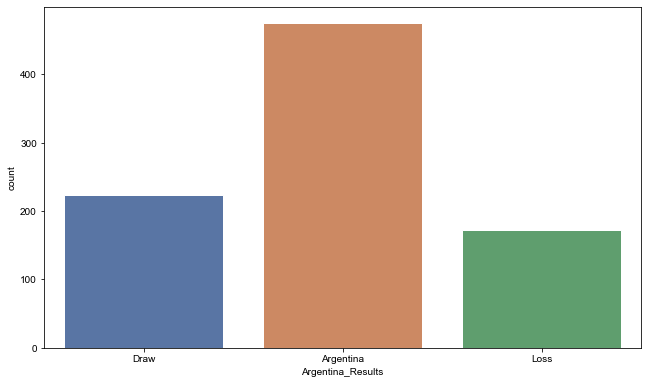

In [14]:
#what is the common game outcome for argentina visualisation
wins = []
for row in argentina_1930['winning_team']:
    if row != 'Argentina' and row != 'Draw':
        wins.append('Loss')
    else:
        wins.append(row)
winsdf= pd.DataFrame(wins, columns=[ 'Argentina_Results'])

#plotting
fig, ax = plt.subplots(1)
fig.set_size_inches(10.7, 6.27)
sns.set(style='darkgrid')
sns.countplot(x='Argentina_Results', data=winsdf)

In [15]:
#narrowing to team patcipating in the world cup
worldcup_teams = ['Qatar', 'Ecuador', 'Senegal', 'Netherlands', 'England', 'Iran', 'USA', 
                  'Wales', 'Argentina', 'Saudi Arabia', 'Mexico', 'Poland', 'France', 
                  'Australia', 'Denmark', 'Tunisia', 'Spain', 'Costa Rica', 'Germany', 
                  'Japan', 'Belgium', 'Canada', 'Morocco', 'Croatia', 'Brazil', 'Serbia', 
                  'Switzerland', 'Cameroon', 'Portugal', 'Ghana', 'Uruguay', 'Korea Republic']
df_teams_home = results[results['home_team'].isin(worldcup_teams)]
df_teams_away = results[results['away_team'].isin(worldcup_teams)]
df_teams = pd.concat((df_teams_home, df_teams_away))
df_teams.drop_duplicates()
df_teams.count()

date               21241
home_team          21241
away_team          21241
home_score         21151
away_score         21151
tournament         21241
city               21241
country            21241
neutral            21241
winning_team       21241
goal_difference    21151
dtype: int64

In [16]:
df_teams.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,winning_team,goal_difference
1,1873-03-08,England,Scotland,4.0,2.0,Friendly,London,England,False,England,2.0
3,1875-03-06,England,Scotland,2.0,2.0,Friendly,London,England,False,Draw,0.0
6,1877-03-03,England,Scotland,1.0,3.0,Friendly,London,England,False,Scotland,2.0
7,1877-03-05,Wales,Scotland,0.0,2.0,Friendly,Wrexham,Wales,False,Scotland,2.0
10,1879-01-18,England,Wales,2.0,1.0,Friendly,London,England,False,England,1.0


In [17]:
#create an year column to drop games before 1930
year = []
for row in df_teams['date']:
    year.append(int(row[:4]))
df_teams['match_year'] = year
df_teams_1930 = df_teams[df_teams.match_year >= 1930]
df_teams_1930.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,winning_team,goal_difference,match_year
1263,1930-01-01,Spain,Czechoslovakia,1.0,0.0,Friendly,Barcelona,Spain,False,Spain,1.0,1930
1264,1930-01-12,Portugal,Czechoslovakia,1.0,0.0,Friendly,Lisbon,Portugal,False,Portugal,1.0,1930
1270,1930-02-23,Portugal,France,2.0,0.0,Friendly,Porto,Portugal,False,Portugal,2.0,1930
1271,1930-03-02,Germany,Italy,0.0,2.0,Friendly,Frankfurt am Main,Germany,False,Italy,2.0,1930
1273,1930-03-23,France,Switzerland,3.0,3.0,Friendly,Colombes,France,False,Draw,0.0,1930


In [18]:
#dropping columns that wll not affect matchoutcomes
df_teams_1930 = df_teams.drop(['date', 'home_score', 'away_score', 'tournament', 'city', 'country', 'goal_difference', 'match_year'], axis=1)
df_teams_1930.head()

,home_team,away_team,neutral,winning_team
1,England,Scotland,False,England
3,England,Scotland,False,Draw
6,England,Scotland,False,Scotland
7,Wales,Scotland,False,Scotland
10,England,Wales,False,England


In [19]:
#Building the model
#the prediction label: The winning_team column will show "2" if the home team has won, "1" if it was a tie, and "0" if the away team has won.

df_teams_1930 = df_teams_1930.reset_index(drop=True)
df_teams_1930.loc[df_teams_1930.winning_team == df_teams_1930.home_team,'winning_team']=2
df_teams_1930.loc[df_teams_1930.winning_team == 'Draw', 'winning_team']=1
df_teams_1930.loc[df_teams_1930.winning_team == df_teams_1930.away_team, 'winning_team']=0

df_teams_1930.head()

,home_team,away_team,neutral,winning_team
0,England,Scotland,False,2
1,England,Scotland,False,1
2,England,Scotland,False,0
3,Wales,Scotland,False,0
4,England,Wales,False,2


In [20]:
#convert home team and away team from categorical variables to continous inputs 
# Get dummy variables
final = pd.get_dummies(df_teams_1930, prefix=['home_team', 'away_team'], columns=['home_team', 'away_team'])

# Separate X and y sets
X = final.drop(['winning_team'], axis=1)
y = final["winning_team"]
y = y.astype('int')

# Separate train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [21]:
final.head()

,neutral,winning_team,home_team_Afghanistan,home_team_Albania,home_team_Algeria,home_team_Andalusia,home_team_Andorra,home_team_Angola,home_team_Argentina,home_team_Armenia,...,away_team_Vanuatu,away_team_Venezuela,away_team_Vietnam,away_team_Vietnam Republic,away_team_Wales,away_team_Yemen,away_team_Yemen DPR,away_team_Yugoslavia,away_team_Zambia,away_team_Zimbabwe
0,False,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,False,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,False,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,False,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,False,2,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [22]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
score = logreg.score(X_train, y_train)
score2 = logreg.score(X_test, y_test)

print("Training set accuracy: ", '%.3f'%(score))
print("Test set accuracy: ", '%.3f'%(score2))

C:\Users\karth\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training set accuracy:  0.573
Test set accuracy:  0.572


In [23]:
#adding Fifa rankings
#the team which is positioned higher on the FIFA Ranking will be considered "favourite" for the match
#and therefore, will be positioned under the "home_teams" column
#since there are no "home" or "away" teams in World Cup games. 

# Loading new datasets
ranking = pd.read_csv('data/fifa_ranking.csv') 
fixtures = pd.read_csv('data/fixtures.csv')

# List for storing the group stage games
pred_set = []

In [24]:
ranking

,Position,Team,Points
0,1,Brazil,1841.30
1,2,Belgium,1816.71
2,3,Argentina,1773.88
3,4,France,1759.78
4,5,England,1728.47
...,...,...,...
206,207,Sri Lanka,825.25
207,208,US Virgin Islands,823.97
208,209,British Virgin Islands,809.32
209,210,Anguilla,790.74


In [25]:
fixtures

,Round Number,Date,Location,Home Team,Away Team,Group,Result
0,1,2022,Qatar,Qatar,Ecuador,Group A,NaN
1,1,2022,Qatar,Senegal,Netherlands,Group A,NaN
2,2,2022,Qatar,Qatar,Senegal,Group A,NaN
3,2,2022,Qatar,Netherlands,Ecuador,Group A,NaN
4,3,2022,Qatar,Ecuador,Senegal,Group A,NaN
...,...,...,...,...,...,...,...
59,Quarter Finals,2022,Qatar,To be announced,To be announced,NaN,NaN
60,Semi Finals,2022,Qatar,To be announced,To be announced,NaN,NaN
61,Semi Finals,2022,Qatar,To be announced,To be announced,NaN,NaN
62,Finals,2022,Qatar,To be announced,To be announced,NaN,NaN


In [26]:
# Create new columns with ranking position of each team
#fixtures.pop('first_position')
#fixtures.pop('second_position')
fixtures.insert(1, 'first_position', fixtures['Home Team'].map(ranking.set_index('Team')['Position']))
fixtures.insert(2, 'second_position', fixtures['Away Team'].map(ranking.set_index('Team')['Position']))

In [27]:
fixtures

,Round Number,first_position,second_position,Date,Location,Home Team,Away Team,Group,Result
0,1,50.0,44.0,2022,Qatar,Qatar,Ecuador,Group A,NaN
1,1,18.0,8.0,2022,Qatar,Senegal,Netherlands,Group A,NaN
2,2,50.0,18.0,2022,Qatar,Qatar,Senegal,Group A,NaN
3,2,8.0,44.0,2022,Qatar,Netherlands,Ecuador,Group A,NaN
4,3,44.0,18.0,2022,Qatar,Ecuador,Senegal,Group A,NaN
...,...,...,...,...,...,...,...,...,...
59,Quarter Finals,NaN,NaN,2022,Qatar,To be announced,To be announced,NaN,NaN
60,Semi Finals,NaN,NaN,2022,Qatar,To be announced,To be announced,NaN,NaN
61,Semi Finals,NaN,NaN,2022,Qatar,To be announced,To be announced,NaN,NaN
62,Finals,NaN,NaN,2022,Qatar,To be announced,To be announced,NaN,NaN


In [28]:
fixtures = fixtures.iloc[:48, :]
fixtures.tail()

,Round Number,first_position,second_position,Date,Location,Home Team,Away Team,Group,Result
43,1,9.0,61.0,2022,Qatar,Portugal,Ghana,Group H,NaN
44,2,28.0,61.0,2022,Qatar,Korea Republic,Ghana,Group H,NaN
45,2,9.0,14.0,2022,Qatar,Portugal,Uruguay,Group H,NaN
46,3,61.0,14.0,2022,Qatar,Ghana,Uruguay,Group H,NaN
47,3,28.0,9.0,2022,Qatar,Korea Republic,Portugal,Group H,NaN


In [29]:
# Loop to add teams to new prediction dataset based on the ranking position of each team
for index, row in fixtures.iterrows():
    if row['first_position'] < row['second_position']:
        pred_set.append({'home_team': row['Home Team'], 'away_team': row['Away Team'], 'winning_team': None})
    else:
        pred_set.append({'home_team': row['Away Team'], 'away_team': row['Home Team'], 'winning_team': None})
        
pred_set = pd.DataFrame(pred_set)
backup_pred_set = pred_set

pred_set.head()

,home_team,away_team,winning_team
0,Ecuador,Qatar,None
1,Netherlands,Senegal,None
2,Senegal,Qatar,None
3,Netherlands,Ecuador,None
4,Senegal,Ecuador,None


In [30]:
# Get dummy variables and drop winning_team column
pred_set = pd.get_dummies(pred_set, prefix=['home_team', 'away_team'], columns=['home_team', 'away_team'])

# Add missing columns compared to the model's training dataset
missing_cols = set(final.columns) - set(pred_set.columns)
for c in missing_cols:
    pred_set[c] = 0
pred_set = pred_set[final.columns]

# Remove winning team column
pred_set = pred_set.drop(['winning_team'], axis=1)

pred_set.head()

C:\Users\karth\AppData\Local\Temp\ipykernel_21944\3023252425.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  pred_set[c] = 0
C:\Users\karth\AppData\Local\Temp\ipykernel_21944\3023252425.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  pred_set[c] = 0
C:\Users\karth\AppData\Local\Temp\ipykernel_21944\3023252425.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) i

C:\Users\karth\AppData\Local\Temp\ipykernel_21944\3023252425.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  pred_set[c] = 0
C:\Users\karth\AppData\Local\Temp\ipykernel_21944\3023252425.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  pred_set[c] = 0
C:\Users\karth\AppData\Local\Temp\ipykernel_21944\3023252425.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) i

C:\Users\karth\AppData\Local\Temp\ipykernel_21944\3023252425.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  pred_set[c] = 0
C:\Users\karth\AppData\Local\Temp\ipykernel_21944\3023252425.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  pred_set[c] = 0
C:\Users\karth\AppData\Local\Temp\ipykernel_21944\3023252425.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) i

C:\Users\karth\AppData\Local\Temp\ipykernel_21944\3023252425.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  pred_set[c] = 0
C:\Users\karth\AppData\Local\Temp\ipykernel_21944\3023252425.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  pred_set[c] = 0
C:\Users\karth\AppData\Local\Temp\ipykernel_21944\3023252425.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) i

C:\Users\karth\AppData\Local\Temp\ipykernel_21944\3023252425.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  pred_set[c] = 0
C:\Users\karth\AppData\Local\Temp\ipykernel_21944\3023252425.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  pred_set[c] = 0
C:\Users\karth\AppData\Local\Temp\ipykernel_21944\3023252425.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) i

C:\Users\karth\AppData\Local\Temp\ipykernel_21944\3023252425.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  pred_set[c] = 0
C:\Users\karth\AppData\Local\Temp\ipykernel_21944\3023252425.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  pred_set[c] = 0
C:\Users\karth\AppData\Local\Temp\ipykernel_21944\3023252425.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) i

C:\Users\karth\AppData\Local\Temp\ipykernel_21944\3023252425.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  pred_set[c] = 0
C:\Users\karth\AppData\Local\Temp\ipykernel_21944\3023252425.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  pred_set[c] = 0
C:\Users\karth\AppData\Local\Temp\ipykernel_21944\3023252425.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) i

C:\Users\karth\AppData\Local\Temp\ipykernel_21944\3023252425.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  pred_set[c] = 0
C:\Users\karth\AppData\Local\Temp\ipykernel_21944\3023252425.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  pred_set[c] = 0
C:\Users\karth\AppData\Local\Temp\ipykernel_21944\3023252425.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) i

C:\Users\karth\AppData\Local\Temp\ipykernel_21944\3023252425.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  pred_set[c] = 0
C:\Users\karth\AppData\Local\Temp\ipykernel_21944\3023252425.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  pred_set[c] = 0
C:\Users\karth\AppData\Local\Temp\ipykernel_21944\3023252425.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) i

,neutral,home_team_Afghanistan,home_team_Albania,home_team_Algeria,home_team_Andalusia,home_team_Andorra,home_team_Angola,home_team_Argentina,home_team_Armenia,home_team_Aruba,...,away_team_Vanuatu,away_team_Venezuela,away_team_Vietnam,away_team_Vietnam Republic,away_team_Wales,away_team_Yemen,away_team_Yemen DPR,away_team_Yugoslavia,away_team_Zambia,away_team_Zimbabwe
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [31]:
#group matches 
predictions = logreg.predict(pred_set)
for i in range(fixtures.shape[0]):
    print(backup_pred_set.iloc[i, 1] + " and " + backup_pred_set.iloc[i, 0])
    if predictions[i] == 2:
        print("Winner: " + backup_pred_set.iloc[i, 0])
    elif predictions[i] == 1:
        print("Draw")
    elif predictions[i] == 0:
        print("Winner: " + backup_pred_set.iloc[i, 1])
    print('Probability of ' + backup_pred_set.iloc[i, 0] + ' winning: ', '%.3f'%(logreg.predict_proba(pred_set)[i][2]))
    print('Probability of Draw: ', '%.3f'%(logreg.predict_proba(pred_set)[i][1]))
    print('Probability of ' + backup_pred_set.iloc[i, 1] + ' winning: ', '%.3f'%(logreg.predict_proba(pred_set)[i][0]))
    print("")

Qatar and Ecuador
Winner: Ecuador
Probability of Ecuador winning:  0.666
Probability of Draw:  0.223
Probability of Qatar winning:  0.110

Senegal and Netherlands
Winner: Netherlands
Probability of Netherlands winning:  0.701
Probability of Draw:  0.207
Probability of Senegal winning:  0.091

Qatar and Senegal
Winner: Senegal
Probability of Senegal winning:  0.667
Probability of Draw:  0.240
Probability of Qatar winning:  0.093

Ecuador and Netherlands
Winner: Netherlands
Probability of Netherlands winning:  0.704
Probability of Draw:  0.226
Probability of Ecuador winning:  0.070

Ecuador and Senegal
Winner: Senegal
Probability of Senegal winning:  0.544
Probability of Draw:  0.336
Probability of Ecuador winning:  0.121

Qatar and Netherlands
Winner: Netherlands
Probability of Netherlands winning:  0.800
Probability of Draw:  0.150
Probability of Qatar winning:  0.050

England and Iran
Winner: England
Probability of Iran winning:  0.182
Probability of Draw:  0.312
Probability of Englan

### Based on the results above
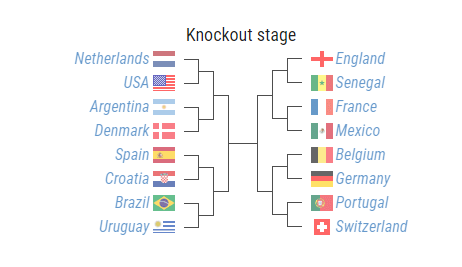
credit: https://ultra.zone/2022-FIFA-World-Cup-Group-Stage

In [32]:
# List of tuples before 

group_16 = [('Netherlands', 'USA'),
            ('Argentina', 'Denmark'),
            ('Spain', 'Croatia'),
            ('Brazil', 'Uruguay'),
            ('England', 'Senegal'),
            ('France', 'Mexico'),
            ('Belgium', 'Germany'),
            ('Portugal', 'Switzerland')]

In [33]:
def clean_and_predict(matches, ranking, final, logreg):

    # Initialization of auxiliary list for data cleaning
    positions = []

    # Loop to retrieve each team's position according to FIFA ranking
    for match in matches:
        positions.append(ranking.loc[ranking['Team'] == match[0],'Position'].iloc[0])
        positions.append(ranking.loc[ranking['Team'] == match[1],'Position'].iloc[0])
    
    # Creating the DataFrame for prediction
    pred_set = []

    # Initializing iterators for while loop
    i = 0
    j = 0

    # 'i' will be the iterator for the 'positions' list, and 'j' for the list of matches (list of tuples)
    while i < len(positions):
        dict1 = {}

        # If position of first team is better, he will be the 'home' team, and vice-versa
        if positions[i] < positions[i + 1]:
            dict1.update({'home_team': matches[j][0], 'away_team': matches[j][1]})
        else:
            dict1.update({'home_team': matches[j][1], 'away_team': matches[j][0]})

        # Append updated dictionary to the list, that will later be converted into a DataFrame
        pred_set.append(dict1)
        i += 2
        j += 1

    # Convert list into DataFrame
    pred_set = pd.DataFrame(pred_set)
    backup_pred_set = pred_set

    # Get dummy variables and drop winning_team column
    pred_set = pd.get_dummies(pred_set, prefix=['home_team', 'away_team'], columns=['home_team', 'away_team'])

    # Add missing columns compared to the model's training dataset
    missing_cols2 = set(final.columns) - set(pred_set.columns)
    for c in missing_cols2:
        pred_set[c] = 0
    pred_set = pred_set[final.columns]

    # Remove winning team column
    pred_set = pred_set.drop(['winning_team'], axis=1)

    # Predict!
    predictions = logreg.predict(pred_set)
    for i in range(len(pred_set)):
        print(backup_pred_set.iloc[i, 1] + " and " + backup_pred_set.iloc[i, 0])
        if predictions[i] == 2:
            print("Winner: " + backup_pred_set.iloc[i, 0])
        elif predictions[i] == 1:
            print("Draw")
        elif predictions[i] == 0:
            print("Winner: " + backup_pred_set.iloc[i, 1])
        print('Probability of ' + backup_pred_set.iloc[i, 0] + ' winning: ' , '%.3f'%(logreg.predict_proba(pred_set)[i][2]))
        print('Probability of Draw: ', '%.3f'%(logreg.predict_proba(pred_set)[i][1])) 
        print('Probability of ' + backup_pred_set.iloc[i, 1] + ' winning: ', '%.3f'%(logreg.predict_proba(pred_set)[i][0]))
        print("")

In [34]:
clean_and_predict(group_16, ranking, final, logreg)

C:\Users\karth\AppData\Local\Temp\ipykernel_21944\628805474.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  pred_set[c] = 0
C:\Users\karth\AppData\Local\Temp\ipykernel_21944\628805474.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  pred_set[c] = 0
C:\Users\karth\AppData\Local\Temp\ipykernel_21944\628805474.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) i

C:\Users\karth\AppData\Local\Temp\ipykernel_21944\628805474.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  pred_set[c] = 0
C:\Users\karth\AppData\Local\Temp\ipykernel_21944\628805474.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  pred_set[c] = 0
C:\Users\karth\AppData\Local\Temp\ipykernel_21944\628805474.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) i

C:\Users\karth\AppData\Local\Temp\ipykernel_21944\628805474.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  pred_set[c] = 0
C:\Users\karth\AppData\Local\Temp\ipykernel_21944\628805474.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  pred_set[c] = 0
C:\Users\karth\AppData\Local\Temp\ipykernel_21944\628805474.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) i

C:\Users\karth\AppData\Local\Temp\ipykernel_21944\628805474.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  pred_set[c] = 0
C:\Users\karth\AppData\Local\Temp\ipykernel_21944\628805474.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  pred_set[c] = 0
C:\Users\karth\AppData\Local\Temp\ipykernel_21944\628805474.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) i

C:\Users\karth\AppData\Local\Temp\ipykernel_21944\628805474.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  pred_set[c] = 0
C:\Users\karth\AppData\Local\Temp\ipykernel_21944\628805474.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  pred_set[c] = 0
C:\Users\karth\AppData\Local\Temp\ipykernel_21944\628805474.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) i

C:\Users\karth\AppData\Local\Temp\ipykernel_21944\628805474.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  pred_set[c] = 0
C:\Users\karth\AppData\Local\Temp\ipykernel_21944\628805474.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  pred_set[c] = 0
C:\Users\karth\AppData\Local\Temp\ipykernel_21944\628805474.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) i

C:\Users\karth\AppData\Local\Temp\ipykernel_21944\628805474.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  pred_set[c] = 0
C:\Users\karth\AppData\Local\Temp\ipykernel_21944\628805474.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  pred_set[c] = 0
C:\Users\karth\AppData\Local\Temp\ipykernel_21944\628805474.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) i

C:\Users\karth\AppData\Local\Temp\ipykernel_21944\628805474.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  pred_set[c] = 0
C:\Users\karth\AppData\Local\Temp\ipykernel_21944\628805474.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  pred_set[c] = 0
C:\Users\karth\AppData\Local\Temp\ipykernel_21944\628805474.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) i

C:\Users\karth\AppData\Local\Temp\ipykernel_21944\628805474.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  pred_set[c] = 0
C:\Users\karth\AppData\Local\Temp\ipykernel_21944\628805474.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  pred_set[c] = 0
C:\Users\karth\AppData\Local\Temp\ipykernel_21944\628805474.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) i

C:\Users\karth\AppData\Local\Temp\ipykernel_21944\628805474.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  pred_set[c] = 0
C:\Users\karth\AppData\Local\Temp\ipykernel_21944\628805474.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  pred_set[c] = 0
C:\Users\karth\AppData\Local\Temp\ipykernel_21944\628805474.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) i

C:\Users\karth\AppData\Local\Temp\ipykernel_21944\628805474.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  pred_set[c] = 0
C:\Users\karth\AppData\Local\Temp\ipykernel_21944\628805474.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  pred_set[c] = 0
C:\Users\karth\AppData\Local\Temp\ipykernel_21944\628805474.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) i

C:\Users\karth\AppData\Local\Temp\ipykernel_21944\628805474.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  pred_set[c] = 0
C:\Users\karth\AppData\Local\Temp\ipykernel_21944\628805474.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  pred_set[c] = 0
C:\Users\karth\AppData\Local\Temp\ipykernel_21944\628805474.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) i

USA and Netherlands
Winner: Netherlands
Probability of Netherlands winning:  0.831
Probability of Draw:  0.119
Probability of USA winning:  0.050

Denmark and Argentina
Winner: Argentina
Probability of Argentina winning:  0.707
Probability of Draw:  0.184
Probability of Denmark winning:  0.109

Croatia and Spain
Winner: Spain
Probability of Spain winning:  0.574
Probability of Draw:  0.204
Probability of Croatia winning:  0.222

Uruguay and Brazil
Winner: Brazil
Probability of Brazil winning:  0.713
Probability of Draw:  0.174
Probability of Uruguay winning:  0.113

Senegal and England
Winner: England
Probability of England winning:  0.736
Probability of Draw:  0.190
Probability of Senegal winning:  0.074

Mexico and France
Winner: France
Probability of France winning:  0.592
Probability of Draw:  0.251
Probability of Mexico winning:  0.158

Germany and Belgium
Winner: Germany
Probability of Belgium winning:  0.335
Probability of Draw:  0.182
Probability of Germany winning:  0.483

Swi

C:\Users\karth\AppData\Local\Temp\ipykernel_21944\628805474.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  pred_set[c] = 0
C:\Users\karth\AppData\Local\Temp\ipykernel_21944\628805474.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  pred_set[c] = 0
C:\Users\karth\AppData\Local\Temp\ipykernel_21944\628805474.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) i

In [35]:
# List of matches
quarters = [('Netherlands', 'Argentina'),
            ('Spain', 'Brazil'),
            ('England', 'France'),
            ('Germany', 'Portugal')]

In [36]:
clean_and_predict(quarters, ranking, final, logreg)

C:\Users\karth\AppData\Local\Temp\ipykernel_21944\628805474.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  pred_set[c] = 0
C:\Users\karth\AppData\Local\Temp\ipykernel_21944\628805474.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  pred_set[c] = 0
C:\Users\karth\AppData\Local\Temp\ipykernel_21944\628805474.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) i

C:\Users\karth\AppData\Local\Temp\ipykernel_21944\628805474.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  pred_set[c] = 0
C:\Users\karth\AppData\Local\Temp\ipykernel_21944\628805474.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  pred_set[c] = 0
C:\Users\karth\AppData\Local\Temp\ipykernel_21944\628805474.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) i

C:\Users\karth\AppData\Local\Temp\ipykernel_21944\628805474.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  pred_set[c] = 0
C:\Users\karth\AppData\Local\Temp\ipykernel_21944\628805474.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  pred_set[c] = 0
C:\Users\karth\AppData\Local\Temp\ipykernel_21944\628805474.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) i

C:\Users\karth\AppData\Local\Temp\ipykernel_21944\628805474.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  pred_set[c] = 0
C:\Users\karth\AppData\Local\Temp\ipykernel_21944\628805474.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  pred_set[c] = 0
C:\Users\karth\AppData\Local\Temp\ipykernel_21944\628805474.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) i

C:\Users\karth\AppData\Local\Temp\ipykernel_21944\628805474.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  pred_set[c] = 0
C:\Users\karth\AppData\Local\Temp\ipykernel_21944\628805474.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  pred_set[c] = 0
C:\Users\karth\AppData\Local\Temp\ipykernel_21944\628805474.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) i

C:\Users\karth\AppData\Local\Temp\ipykernel_21944\628805474.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  pred_set[c] = 0
C:\Users\karth\AppData\Local\Temp\ipykernel_21944\628805474.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  pred_set[c] = 0
C:\Users\karth\AppData\Local\Temp\ipykernel_21944\628805474.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) i

C:\Users\karth\AppData\Local\Temp\ipykernel_21944\628805474.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  pred_set[c] = 0
C:\Users\karth\AppData\Local\Temp\ipykernel_21944\628805474.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  pred_set[c] = 0
C:\Users\karth\AppData\Local\Temp\ipykernel_21944\628805474.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) i

C:\Users\karth\AppData\Local\Temp\ipykernel_21944\628805474.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  pred_set[c] = 0
C:\Users\karth\AppData\Local\Temp\ipykernel_21944\628805474.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  pred_set[c] = 0
C:\Users\karth\AppData\Local\Temp\ipykernel_21944\628805474.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) i

C:\Users\karth\AppData\Local\Temp\ipykernel_21944\628805474.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  pred_set[c] = 0
C:\Users\karth\AppData\Local\Temp\ipykernel_21944\628805474.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  pred_set[c] = 0
C:\Users\karth\AppData\Local\Temp\ipykernel_21944\628805474.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) i

C:\Users\karth\AppData\Local\Temp\ipykernel_21944\628805474.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  pred_set[c] = 0
C:\Users\karth\AppData\Local\Temp\ipykernel_21944\628805474.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  pred_set[c] = 0
C:\Users\karth\AppData\Local\Temp\ipykernel_21944\628805474.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) i

C:\Users\karth\AppData\Local\Temp\ipykernel_21944\628805474.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  pred_set[c] = 0
C:\Users\karth\AppData\Local\Temp\ipykernel_21944\628805474.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  pred_set[c] = 0
C:\Users\karth\AppData\Local\Temp\ipykernel_21944\628805474.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) i

C:\Users\karth\AppData\Local\Temp\ipykernel_21944\628805474.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  pred_set[c] = 0
C:\Users\karth\AppData\Local\Temp\ipykernel_21944\628805474.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  pred_set[c] = 0
C:\Users\karth\AppData\Local\Temp\ipykernel_21944\628805474.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) i

C:\Users\karth\AppData\Local\Temp\ipykernel_21944\628805474.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  pred_set[c] = 0
C:\Users\karth\AppData\Local\Temp\ipykernel_21944\628805474.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  pred_set[c] = 0
C:\Users\karth\AppData\Local\Temp\ipykernel_21944\628805474.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) i

Netherlands and Argentina
Winner: Argentina
Probability of Argentina winning:  0.595
Probability of Draw:  0.239
Probability of Netherlands winning:  0.166

Spain and Brazil
Winner: Brazil
Probability of Brazil winning:  0.549
Probability of Draw:  0.243
Probability of Spain winning:  0.207

England and France
Winner: England
Probability of France winning:  0.350
Probability of Draw:  0.284
Probability of England winning:  0.366

Germany and Portugal
Winner: Portugal
Probability of Portugal winning:  0.356
Probability of Draw:  0.303
Probability of Germany winning:  0.341



C:\Users\karth\AppData\Local\Temp\ipykernel_21944\628805474.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  pred_set[c] = 0
C:\Users\karth\AppData\Local\Temp\ipykernel_21944\628805474.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  pred_set[c] = 0
C:\Users\karth\AppData\Local\Temp\ipykernel_21944\628805474.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) i

In [37]:
# List of matches
semi = [('Argentina', 'Brazil'),
        ('England', 'Portugal')]

In [38]:
clean_and_predict(semi, ranking, final, logreg)

C:\Users\karth\AppData\Local\Temp\ipykernel_21944\628805474.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  pred_set[c] = 0
C:\Users\karth\AppData\Local\Temp\ipykernel_21944\628805474.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  pred_set[c] = 0
C:\Users\karth\AppData\Local\Temp\ipykernel_21944\628805474.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) i

C:\Users\karth\AppData\Local\Temp\ipykernel_21944\628805474.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  pred_set[c] = 0
C:\Users\karth\AppData\Local\Temp\ipykernel_21944\628805474.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  pred_set[c] = 0
C:\Users\karth\AppData\Local\Temp\ipykernel_21944\628805474.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) i

C:\Users\karth\AppData\Local\Temp\ipykernel_21944\628805474.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  pred_set[c] = 0
C:\Users\karth\AppData\Local\Temp\ipykernel_21944\628805474.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  pred_set[c] = 0
C:\Users\karth\AppData\Local\Temp\ipykernel_21944\628805474.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) i

C:\Users\karth\AppData\Local\Temp\ipykernel_21944\628805474.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  pred_set[c] = 0
C:\Users\karth\AppData\Local\Temp\ipykernel_21944\628805474.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  pred_set[c] = 0
C:\Users\karth\AppData\Local\Temp\ipykernel_21944\628805474.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) i

C:\Users\karth\AppData\Local\Temp\ipykernel_21944\628805474.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  pred_set[c] = 0
C:\Users\karth\AppData\Local\Temp\ipykernel_21944\628805474.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  pred_set[c] = 0
C:\Users\karth\AppData\Local\Temp\ipykernel_21944\628805474.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) i

C:\Users\karth\AppData\Local\Temp\ipykernel_21944\628805474.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  pred_set[c] = 0
C:\Users\karth\AppData\Local\Temp\ipykernel_21944\628805474.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  pred_set[c] = 0
C:\Users\karth\AppData\Local\Temp\ipykernel_21944\628805474.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) i

C:\Users\karth\AppData\Local\Temp\ipykernel_21944\628805474.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  pred_set[c] = 0
C:\Users\karth\AppData\Local\Temp\ipykernel_21944\628805474.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  pred_set[c] = 0
C:\Users\karth\AppData\Local\Temp\ipykernel_21944\628805474.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) i

C:\Users\karth\AppData\Local\Temp\ipykernel_21944\628805474.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  pred_set[c] = 0
C:\Users\karth\AppData\Local\Temp\ipykernel_21944\628805474.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  pred_set[c] = 0
C:\Users\karth\AppData\Local\Temp\ipykernel_21944\628805474.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) i

C:\Users\karth\AppData\Local\Temp\ipykernel_21944\628805474.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  pred_set[c] = 0
C:\Users\karth\AppData\Local\Temp\ipykernel_21944\628805474.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  pred_set[c] = 0
C:\Users\karth\AppData\Local\Temp\ipykernel_21944\628805474.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) i

C:\Users\karth\AppData\Local\Temp\ipykernel_21944\628805474.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  pred_set[c] = 0
C:\Users\karth\AppData\Local\Temp\ipykernel_21944\628805474.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  pred_set[c] = 0
C:\Users\karth\AppData\Local\Temp\ipykernel_21944\628805474.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) i

C:\Users\karth\AppData\Local\Temp\ipykernel_21944\628805474.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  pred_set[c] = 0
C:\Users\karth\AppData\Local\Temp\ipykernel_21944\628805474.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  pred_set[c] = 0
C:\Users\karth\AppData\Local\Temp\ipykernel_21944\628805474.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) i

C:\Users\karth\AppData\Local\Temp\ipykernel_21944\628805474.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  pred_set[c] = 0
C:\Users\karth\AppData\Local\Temp\ipykernel_21944\628805474.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  pred_set[c] = 0
C:\Users\karth\AppData\Local\Temp\ipykernel_21944\628805474.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) i

C:\Users\karth\AppData\Local\Temp\ipykernel_21944\628805474.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  pred_set[c] = 0
C:\Users\karth\AppData\Local\Temp\ipykernel_21944\628805474.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  pred_set[c] = 0
C:\Users\karth\AppData\Local\Temp\ipykernel_21944\628805474.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) i

C:\Users\karth\AppData\Local\Temp\ipykernel_21944\628805474.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  pred_set[c] = 0
C:\Users\karth\AppData\Local\Temp\ipykernel_21944\628805474.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  pred_set[c] = 0
C:\Users\karth\AppData\Local\Temp\ipykernel_21944\628805474.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) i

Argentina and Brazil
Winner: Brazil
Probability of Brazil winning:  0.637
Probability of Draw:  0.196
Probability of Argentina winning:  0.167

Portugal and England
Winner: England
Probability of England winning:  0.565
Probability of Draw:  0.261
Probability of Portugal winning:  0.174



In [39]:
# 3rd-place match
thirdplacematch = [('Argentina', 'Portugal')]

In [40]:
clean_and_predict(thirdplacematch, ranking, final, logreg)

C:\Users\karth\AppData\Local\Temp\ipykernel_21944\628805474.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  pred_set[c] = 0
C:\Users\karth\AppData\Local\Temp\ipykernel_21944\628805474.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  pred_set[c] = 0
C:\Users\karth\AppData\Local\Temp\ipykernel_21944\628805474.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) i

C:\Users\karth\AppData\Local\Temp\ipykernel_21944\628805474.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  pred_set[c] = 0
C:\Users\karth\AppData\Local\Temp\ipykernel_21944\628805474.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  pred_set[c] = 0
C:\Users\karth\AppData\Local\Temp\ipykernel_21944\628805474.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) i

C:\Users\karth\AppData\Local\Temp\ipykernel_21944\628805474.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  pred_set[c] = 0
C:\Users\karth\AppData\Local\Temp\ipykernel_21944\628805474.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  pred_set[c] = 0
C:\Users\karth\AppData\Local\Temp\ipykernel_21944\628805474.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) i

C:\Users\karth\AppData\Local\Temp\ipykernel_21944\628805474.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  pred_set[c] = 0
C:\Users\karth\AppData\Local\Temp\ipykernel_21944\628805474.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  pred_set[c] = 0
C:\Users\karth\AppData\Local\Temp\ipykernel_21944\628805474.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) i

C:\Users\karth\AppData\Local\Temp\ipykernel_21944\628805474.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  pred_set[c] = 0
C:\Users\karth\AppData\Local\Temp\ipykernel_21944\628805474.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  pred_set[c] = 0
C:\Users\karth\AppData\Local\Temp\ipykernel_21944\628805474.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) i

C:\Users\karth\AppData\Local\Temp\ipykernel_21944\628805474.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  pred_set[c] = 0
C:\Users\karth\AppData\Local\Temp\ipykernel_21944\628805474.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  pred_set[c] = 0
C:\Users\karth\AppData\Local\Temp\ipykernel_21944\628805474.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) i

C:\Users\karth\AppData\Local\Temp\ipykernel_21944\628805474.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  pred_set[c] = 0
C:\Users\karth\AppData\Local\Temp\ipykernel_21944\628805474.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  pred_set[c] = 0
C:\Users\karth\AppData\Local\Temp\ipykernel_21944\628805474.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) i

C:\Users\karth\AppData\Local\Temp\ipykernel_21944\628805474.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  pred_set[c] = 0
C:\Users\karth\AppData\Local\Temp\ipykernel_21944\628805474.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  pred_set[c] = 0
C:\Users\karth\AppData\Local\Temp\ipykernel_21944\628805474.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) i

C:\Users\karth\AppData\Local\Temp\ipykernel_21944\628805474.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  pred_set[c] = 0
C:\Users\karth\AppData\Local\Temp\ipykernel_21944\628805474.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  pred_set[c] = 0
C:\Users\karth\AppData\Local\Temp\ipykernel_21944\628805474.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) i

C:\Users\karth\AppData\Local\Temp\ipykernel_21944\628805474.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  pred_set[c] = 0
C:\Users\karth\AppData\Local\Temp\ipykernel_21944\628805474.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  pred_set[c] = 0
C:\Users\karth\AppData\Local\Temp\ipykernel_21944\628805474.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) i

C:\Users\karth\AppData\Local\Temp\ipykernel_21944\628805474.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  pred_set[c] = 0
C:\Users\karth\AppData\Local\Temp\ipykernel_21944\628805474.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  pred_set[c] = 0
C:\Users\karth\AppData\Local\Temp\ipykernel_21944\628805474.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) i

C:\Users\karth\AppData\Local\Temp\ipykernel_21944\628805474.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  pred_set[c] = 0
C:\Users\karth\AppData\Local\Temp\ipykernel_21944\628805474.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  pred_set[c] = 0
C:\Users\karth\AppData\Local\Temp\ipykernel_21944\628805474.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) i

C:\Users\karth\AppData\Local\Temp\ipykernel_21944\628805474.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  pred_set[c] = 0
C:\Users\karth\AppData\Local\Temp\ipykernel_21944\628805474.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  pred_set[c] = 0
C:\Users\karth\AppData\Local\Temp\ipykernel_21944\628805474.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) i

C:\Users\karth\AppData\Local\Temp\ipykernel_21944\628805474.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  pred_set[c] = 0
C:\Users\karth\AppData\Local\Temp\ipykernel_21944\628805474.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  pred_set[c] = 0
C:\Users\karth\AppData\Local\Temp\ipykernel_21944\628805474.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) i

Portugal and Argentina
Winner: Argentina
Probability of Argentina winning:  0.653
Probability of Draw:  0.229
Probability of Portugal winning:  0.118



In [41]:
# Finals
finals = [('Brazil', 'England')]

In [42]:
clean_and_predict(finals, ranking, final, logreg)

C:\Users\karth\AppData\Local\Temp\ipykernel_21944\628805474.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  pred_set[c] = 0
C:\Users\karth\AppData\Local\Temp\ipykernel_21944\628805474.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  pred_set[c] = 0
C:\Users\karth\AppData\Local\Temp\ipykernel_21944\628805474.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) i

C:\Users\karth\AppData\Local\Temp\ipykernel_21944\628805474.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  pred_set[c] = 0
C:\Users\karth\AppData\Local\Temp\ipykernel_21944\628805474.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  pred_set[c] = 0
C:\Users\karth\AppData\Local\Temp\ipykernel_21944\628805474.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) i

C:\Users\karth\AppData\Local\Temp\ipykernel_21944\628805474.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  pred_set[c] = 0
C:\Users\karth\AppData\Local\Temp\ipykernel_21944\628805474.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  pred_set[c] = 0
C:\Users\karth\AppData\Local\Temp\ipykernel_21944\628805474.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) i

C:\Users\karth\AppData\Local\Temp\ipykernel_21944\628805474.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  pred_set[c] = 0
C:\Users\karth\AppData\Local\Temp\ipykernel_21944\628805474.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  pred_set[c] = 0
C:\Users\karth\AppData\Local\Temp\ipykernel_21944\628805474.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) i

C:\Users\karth\AppData\Local\Temp\ipykernel_21944\628805474.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  pred_set[c] = 0
C:\Users\karth\AppData\Local\Temp\ipykernel_21944\628805474.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  pred_set[c] = 0
C:\Users\karth\AppData\Local\Temp\ipykernel_21944\628805474.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) i

C:\Users\karth\AppData\Local\Temp\ipykernel_21944\628805474.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  pred_set[c] = 0
C:\Users\karth\AppData\Local\Temp\ipykernel_21944\628805474.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  pred_set[c] = 0
C:\Users\karth\AppData\Local\Temp\ipykernel_21944\628805474.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) i

C:\Users\karth\AppData\Local\Temp\ipykernel_21944\628805474.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  pred_set[c] = 0
C:\Users\karth\AppData\Local\Temp\ipykernel_21944\628805474.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  pred_set[c] = 0
C:\Users\karth\AppData\Local\Temp\ipykernel_21944\628805474.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) i

C:\Users\karth\AppData\Local\Temp\ipykernel_21944\628805474.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  pred_set[c] = 0
C:\Users\karth\AppData\Local\Temp\ipykernel_21944\628805474.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  pred_set[c] = 0
C:\Users\karth\AppData\Local\Temp\ipykernel_21944\628805474.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) i

C:\Users\karth\AppData\Local\Temp\ipykernel_21944\628805474.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  pred_set[c] = 0
C:\Users\karth\AppData\Local\Temp\ipykernel_21944\628805474.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  pred_set[c] = 0
C:\Users\karth\AppData\Local\Temp\ipykernel_21944\628805474.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) i

C:\Users\karth\AppData\Local\Temp\ipykernel_21944\628805474.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  pred_set[c] = 0
C:\Users\karth\AppData\Local\Temp\ipykernel_21944\628805474.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  pred_set[c] = 0
C:\Users\karth\AppData\Local\Temp\ipykernel_21944\628805474.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) i

C:\Users\karth\AppData\Local\Temp\ipykernel_21944\628805474.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  pred_set[c] = 0
C:\Users\karth\AppData\Local\Temp\ipykernel_21944\628805474.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  pred_set[c] = 0
C:\Users\karth\AppData\Local\Temp\ipykernel_21944\628805474.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) i

C:\Users\karth\AppData\Local\Temp\ipykernel_21944\628805474.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  pred_set[c] = 0
C:\Users\karth\AppData\Local\Temp\ipykernel_21944\628805474.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  pred_set[c] = 0
C:\Users\karth\AppData\Local\Temp\ipykernel_21944\628805474.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) i

C:\Users\karth\AppData\Local\Temp\ipykernel_21944\628805474.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  pred_set[c] = 0
C:\Users\karth\AppData\Local\Temp\ipykernel_21944\628805474.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  pred_set[c] = 0
C:\Users\karth\AppData\Local\Temp\ipykernel_21944\628805474.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) i

C:\Users\karth\AppData\Local\Temp\ipykernel_21944\628805474.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  pred_set[c] = 0
C:\Users\karth\AppData\Local\Temp\ipykernel_21944\628805474.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  pred_set[c] = 0
C:\Users\karth\AppData\Local\Temp\ipykernel_21944\628805474.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) i

England and Brazil
Winner: Brazil
Probability of Brazil winning:  0.543
Probability of Draw:  0.234
Probability of England winning:  0.223

